# Bank Marketing

A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 

Management is now interested in finding out how a classification model can lead to certain decision-making processes. 

Here is your task:

-Create a classification model in Python. Feel free to use libraries such as SkLearn, Keras/Tensorflow or Pytorch. 

-Analyse the model and provide insight into which features/variables influence the outcome of the classification the most.

-Develop some form of plot or graph with brief comments on your observations. 

This project is a Data-Driven Approach to Predict the Success of Bank Telemarketing. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y). I would be carrying out an exploratory analysis on the data, performing some feature engineering, filling null values, then building a neural network model.

Check the text file provided to check what each column represents and the literature on the data.

Let's import the data and read the file in.



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#lets grab our data
df = pd.read_csv('bank-additional-full.csv',sep =';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()
#I usually do this to get an idea of what my dataframe looks like
#seems like theres no null values, but i can see 'unknown' in the default column, lets explore that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
(df=='unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

##### These unknowns could be taken as null values, i will replace them with null values for easier refrencing

In [6]:
df = df.replace('unknown',np.nan)

In [7]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

These null values would need to be filled or removed, but first lets explore the data, it would give an insight on how to fill the null values.

# EDA

##### These null values would need to be filled or removed, but first lets explore the data, it would give an insight on how to treat the null values and what feature engineering needs to be done

In [8]:
yes_age = df[df['y'] == 'yes']['age']
no_age = df[df['y'] == 'no']['age']

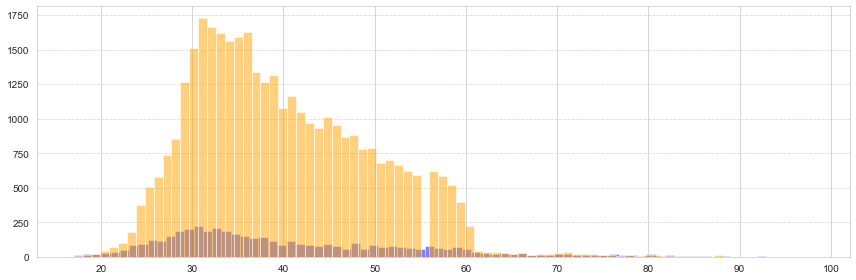

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
plt.hist(yes_age, alpha = 0.5,bins = 80, color = 'blue')
plt.hist(no_age, alpha = 0.5,bins = 80, color = 'orange')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
           

Majority of the individuals fall between 30years and 40 years for both that suscribed and those that didn't

<AxesSubplot:xlabel='y', ylabel='count'>

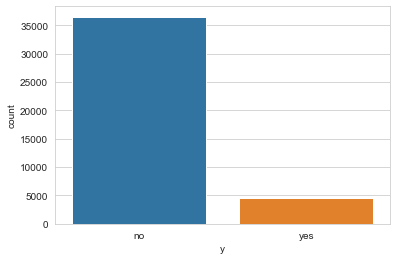

In [10]:
sns.countplot(data = df, x = 'y')

This data is skewed greatly to one side. This could affect the model, making it also skewed

<AxesSubplot:xlabel='job', ylabel='count'>

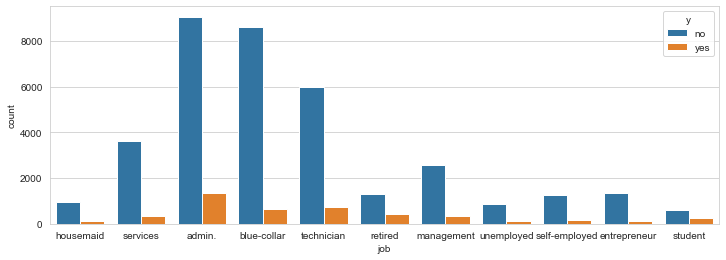

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'job',hue='y')

<AxesSubplot:xlabel='marital', ylabel='count'>

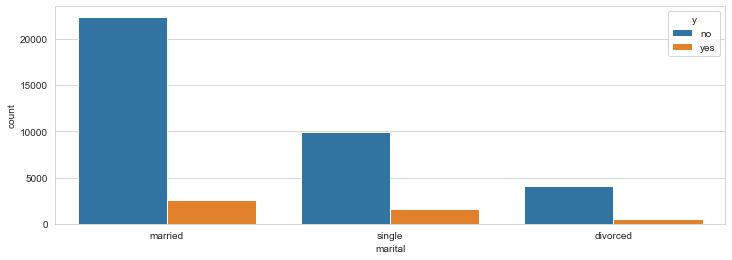

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'marital',hue='y')

<AxesSubplot:xlabel='education', ylabel='count'>

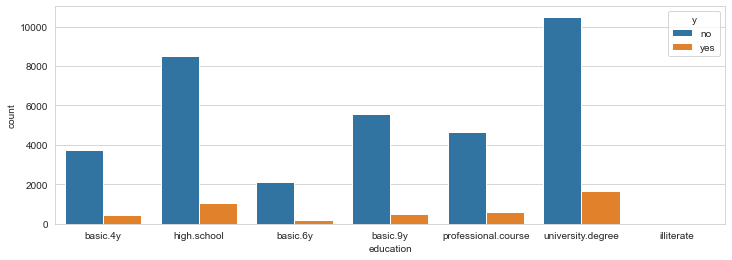

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(data = df, x = 'education',hue='y')

<AxesSubplot:xlabel='contact', ylabel='count'>

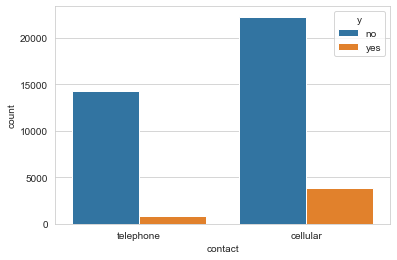

In [14]:
sns.countplot(data = df, x = 'contact',hue='y')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

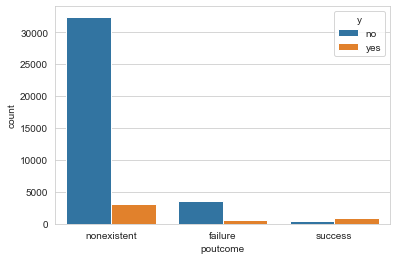

In [15]:
sns.countplot(data = df, x = 'poutcome',hue='y')

<AxesSubplot:xlabel='month', ylabel='count'>

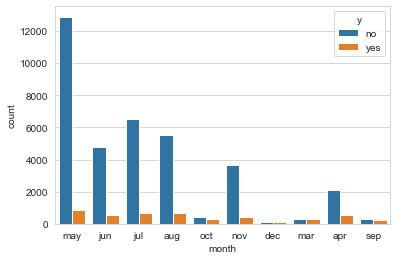

In [16]:
sns.countplot(data = df, x = 'month',hue='y')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

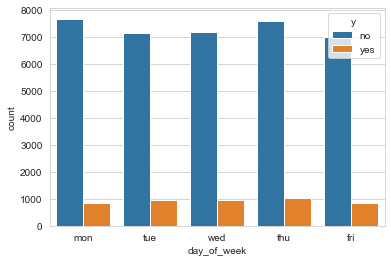

In [17]:
sns.countplot(data = df, x = 'day_of_week',hue='y')

The distribution across the days of the week is almost the same everyday. This makes that feature, useless and would be removed later on

In [18]:
df = df.drop('day_of_week', axis = 1)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='euribor3m'>

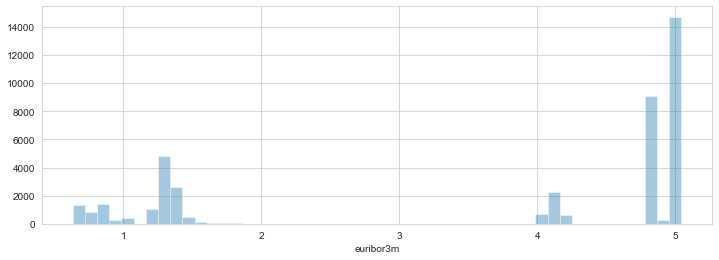

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(df['euribor3m'],bins = 50, kde=False)

<AxesSubplot:xlabel='cons.price.idx'>

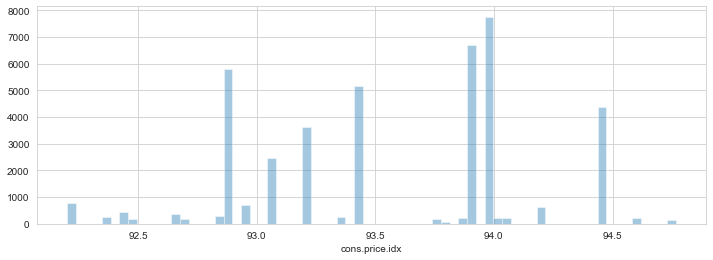

In [20]:
plt.figure(figsize=(12,4))
sns.distplot(df['cons.price.idx'],bins = 70, kde=False)

<AxesSubplot:xlabel='emp.var.rate'>

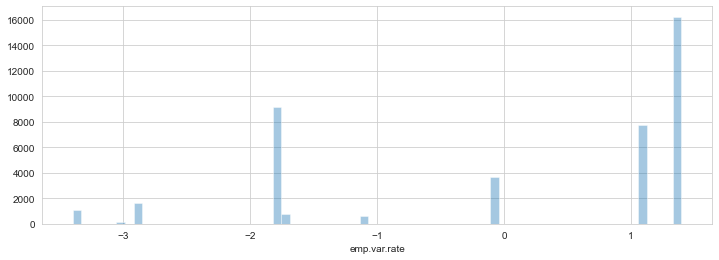

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(df['emp.var.rate'],bins = 70, kde=False)

In [22]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

<AxesSubplot:xlabel='pdays'>

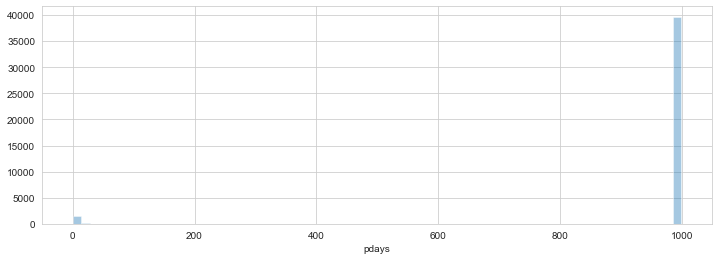

In [23]:
plt.figure(figsize=(12,4))
sns.distplot(df['pdays'],bins = 70, kde=False)

In [24]:
df['pdays'].value_counts() #I would have to group these in the feature engineering

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [25]:
df['campaign'].value_counts() #I would have to group these also

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

<AxesSubplot:>

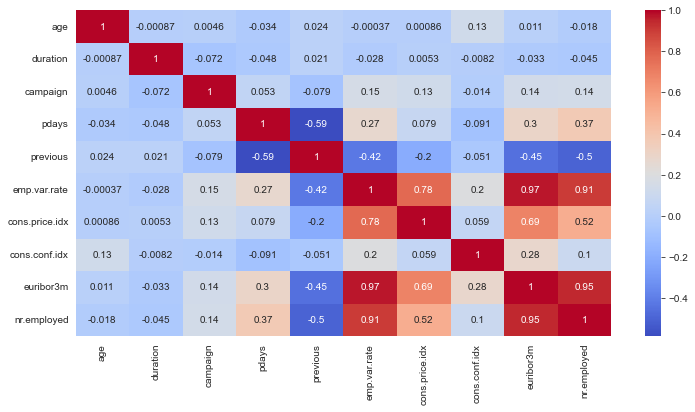

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Notice those highly correlated columns lets explore those

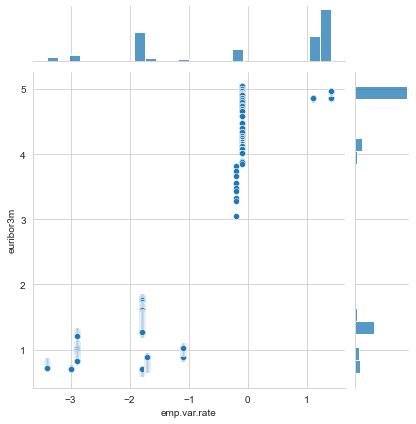

In [27]:
sns.jointplot(x='emp.var.rate',y='euribor3m',data=df,kind='scatter')

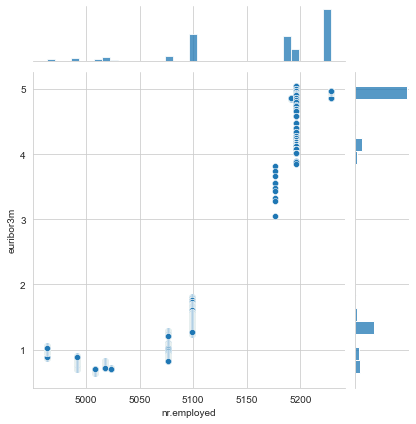

In [28]:
sns.jointplot(x='nr.employed',y='euribor3m',data=df,kind='scatter')

# Feature engineering

### Time to fill in those null values or remove them and overall prepare the data for its model

In [29]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

The default column is missing too much values to fill in, i would srop the column

In [30]:
df = df.drop('default', axis = 1)

Given we have over 40000 inputs, i can afford to drop all the rows with missing values, to increase the accuracy of the model

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Lets revisit pdays

In [33]:
df['pdays'].value_counts()

999    36879
3        393
6        379
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

Since pdays represent number of days that passed by after the client was last contacted from a previous campaign and 999 means client was not previously contacted. i would group the column into two, Contacted and Not contacted 

In [34]:
def inpute_pdays(pdays):
    if pdays == 999:
        return 'Not contacted'
    else:
        return 'Contacted'

In [35]:
df['pdayss'] = df['pdays'].apply(inpute_pdays) #implementing the change

<AxesSubplot:xlabel='pdayss', ylabel='count'>

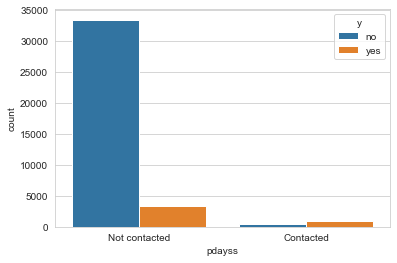

In [36]:
sns.countplot(data = df, x = 'pdayss',hue='y')

You can see those that were contacted, had a higher potential of subscribing than those that were not contacted

Lets not forget we are dropping the duration column, reason being in the text file

In [37]:
df = df.drop(['pdays','duration'], axis = 1)

Now back to the hightly correlated features. I will have to remove one of this columns because two highly correlated features are not good for the model

<AxesSubplot:>

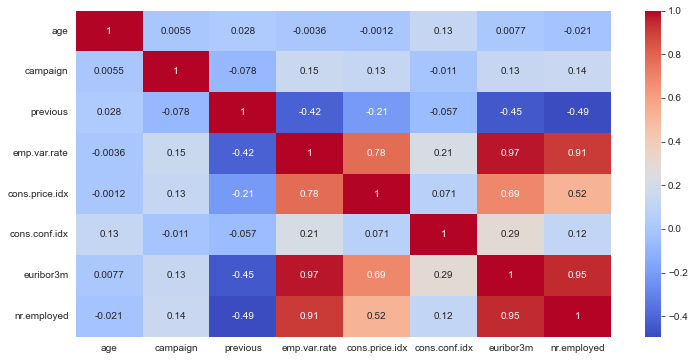

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [39]:
df = df.drop(['euribor3m','nr.employed'], axis = 1)

In [40]:
df

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdayss
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,no,Not contacted
1,57,services,married,high.school,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,no,Not contacted
2,37,services,married,high.school,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,no,Not contacted
3,40,admin.,married,basic.6y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,no,Not contacted
4,56,services,married,high.school,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,no,Not contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,yes,Not contacted
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,no,Not contacted
41185,56,retired,married,university.degree,yes,no,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,no,Not contacted
41186,44,technician,married,professional.course,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,yes,Not contacted


In [41]:
df['previous'].value_counts() #This also works in the same manner as pdays and would be treated the same way

0    33066
1     4234
2      672
3      195
4       57
5       16
6        4
7        1
Name: previous, dtype: int64

In [42]:
def inpute_previous(previous):
    if previous == 0:
        return 'Not contacted'
    else:
        return 'Contacted'

In [43]:
df['previous'] = df['previous'].apply(inpute_previous)

In [44]:
df

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdayss
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,Not contacted,nonexistent,1.1,93.994,-36.4,no,Not contacted
1,57,services,married,high.school,no,no,telephone,may,1,Not contacted,nonexistent,1.1,93.994,-36.4,no,Not contacted
2,37,services,married,high.school,yes,no,telephone,may,1,Not contacted,nonexistent,1.1,93.994,-36.4,no,Not contacted
3,40,admin.,married,basic.6y,no,no,telephone,may,1,Not contacted,nonexistent,1.1,93.994,-36.4,no,Not contacted
4,56,services,married,high.school,no,yes,telephone,may,1,Not contacted,nonexistent,1.1,93.994,-36.4,no,Not contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,1,Not contacted,nonexistent,-1.1,94.767,-50.8,yes,Not contacted
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,1,Not contacted,nonexistent,-1.1,94.767,-50.8,no,Not contacted
41185,56,retired,married,university.degree,yes,no,cellular,nov,2,Not contacted,nonexistent,-1.1,94.767,-50.8,no,Not contacted
41186,44,technician,married,professional.course,no,no,cellular,nov,1,Not contacted,nonexistent,-1.1,94.767,-50.8,yes,Not contacted


<AxesSubplot:xlabel='previous', ylabel='count'>

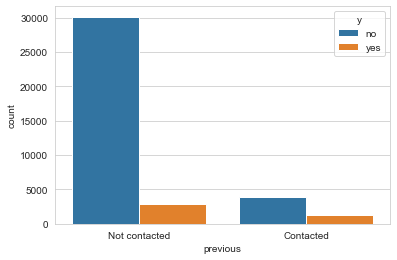

In [45]:
sns.countplot(data = df, x = 'previous',hue='y')

I will replace the 'yes' and 'no' in 'housing','loan' and 'y' to 1 and 0 using get_dummies because that is what the model understands

In [46]:
df['y']=df['y'].replace(['no', 'yes'],[0,1])
df['housing']=df['housing'].replace(['no', 'yes'],[0,1])
df['loan']=df['loan'].replace(['no', 'yes'],[0,1])

In [47]:
dummies = pd.get_dummies(df[['job', 'marital','education','contact','month','previous','poutcome','pdayss']],drop_first=True)
df = df.drop(['job', 'marital','education','contact','month','previous','poutcome','pdayss'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [48]:
df

,age,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,previous_Not contacted,poutcome_nonexistent,poutcome_success,pdayss_Not contacted
0,56,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,57,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,37,1,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,40,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,56,0,1,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1
41184,46,0,0,1,-1.1,94.767,-50.8,0,1,0,...,0,0,0,1,0,0,1,1,0,1
41185,56,1,0,2,-1.1,94.767,-50.8,0,0,0,...,0,0,0,1,0,0,1,1,0,1
41186,44,0,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1


#### I might want to try a different model on this dataset, so i like to have several copies for different models

In [49]:
dfc = df.copy()

In [50]:
dfc

,age,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,previous_Not contacted,poutcome_nonexistent,poutcome_success,pdayss_Not contacted
0,56,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,57,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,37,1,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,40,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,56,0,1,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1
41184,46,0,0,1,-1.1,94.767,-50.8,0,1,0,...,0,0,0,1,0,0,1,1,0,1
41185,56,1,0,2,-1.1,94.767,-50.8,0,0,0,...,0,0,0,1,0,0,1,1,0,1
41186,44,0,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1


# Importing train test split

In [51]:
from sklearn.model_selection import train_test_split

In [107]:
X = dfc.drop('y',axis=1).values
Y = dfc['y'].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [52]:
#Scaling the data, this improves the model
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [111]:
X_train = scaler.fit_transform(X_train)

In [112]:
X_test = scaler.transform(X_test)

# Building a neural network model

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [86]:
model = Sequential()

model.add(Dense(40,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(5, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [88]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=250,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
123/123 [==============================] - 1s 5ms/step - loss: 0.3881 - val_loss: 0.3000
Epoch 2/600
123/123 [==============================] - 0s 4ms/step - loss: 0.3225 - val_loss: 0.2806
Epoch 3/600
123/123 [==============================] - 0s 4ms/step - loss: 0.3111 - val_loss: 0.2782
Epoch 4/600
123/123 [==============================] - 0s 4ms/step - loss: 0.3049 - val_loss: 0.2755
Epoch 5/600
123/123 [==============================] - 0s 4ms/step - loss: 0.2997 - val_loss: 0.2745
Epoch 6/600
123/123 [==============================] - 0s 4ms/step - loss: 0.3014 - val_loss: 0.2742
Epoch 7/600
123/123 [==============================] - 0s 4ms/step - loss: 0.2977 - val_loss: 0.2742
Epoch 8/600
123/123 [==============================] - 0s 4ms/step - loss: 0.2960 - val_loss: 0.2742
Epoch 9/600
123/123 [==============================] - 0s 4ms/step - loss: 0.2951 - val_loss: 0.2727
Epoch 10/600
123/123 [==============================] - 0s 4ms/step - loss: 0.2913 - val_lo

In [89]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

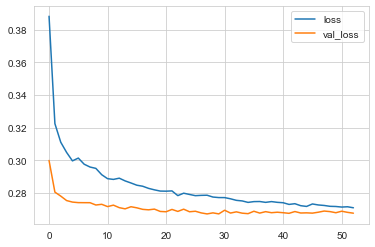

In [90]:
losses[['loss','val_loss']].plot()

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

240/240 [==============================] - 0s 1ms/step


In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6816
           1       0.54      0.36      0.44       833

    accuracy                           0.90      7649
   macro avg       0.73      0.66      0.69      7649
weighted avg       0.88      0.90      0.89      7649



The result is as expected. Predicting the 1's would be tough because we don't have much information and enough data on them.

#### Now i would try different other models to compare and see if i get a better result

#### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [105]:
rfc_pred = rfc.predict(X_test)

In [106]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6816
           1       0.45      0.26      0.33       833

    accuracy                           0.88      7649
   macro avg       0.68      0.61      0.63      7649
weighted avg       0.86      0.88      0.87      7649



It performed poorly

#### KNN Classifier 

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors=1)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [116]:
pred = knn.predict(X_test)

In [117]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6816
           1       0.29      0.29      0.29       833

    accuracy                           0.84      7649
   macro avg       0.60      0.60      0.60      7649
weighted avg       0.84      0.84      0.84      7649



This didn't do any better. But let me iterate different values of K to optimize the model

In [118]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

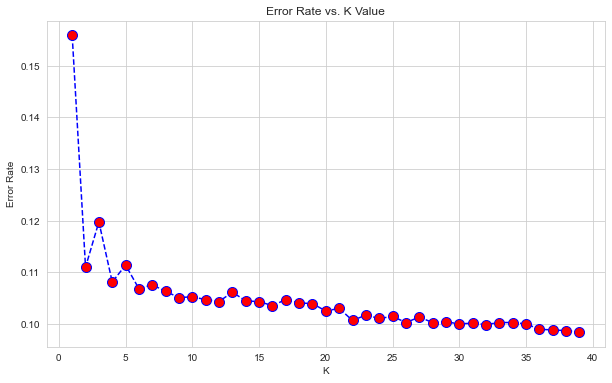

In [119]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [120]:
knn = KNeighborsClassifier(n_neighbors=15)

In [121]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [122]:
pred = knn.predict(X_test)

In [123]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6816
           1       0.56      0.19      0.29       833

    accuracy                           0.90      7649
   macro avg       0.74      0.59      0.61      7649
weighted avg       0.87      0.90      0.87      7649



Still isn't any better

In [124]:
dfc

,age,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,previous_Not contacted,poutcome_nonexistent,poutcome_success,pdayss_Not contacted
0,56,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,57,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,37,1,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,40,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,56,0,1,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1
41184,46,0,0,1,-1.1,94.767,-50.8,0,1,0,...,0,0,0,1,0,0,1,1,0,1
41185,56,1,0,2,-1.1,94.767,-50.8,0,0,0,...,0,0,0,1,0,0,1,1,0,1
41186,44,0,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1


# Resampling Techniques


#### Now i want to try to balance the classes using smote to create synthetic inputs and balance up the classes, hopefully it yields something better 

Import required libraries

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
from imblearn.combine import SMOTEENN

In [74]:
X = dfc.drop('y',axis=1)
Y = dfc['y'] 
#separate feature and target variables

In [99]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101, stratify=Y)

In [100]:
smote = SMOTE(random_state = 42)

In [101]:
#Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [27190  3406]
After SMOTE: [27190 27190]


Smote has been applied and we can see the figures before and after, now let's try all the techniques againas we did earlier

Runnng a neural network again on the new data

In [78]:
#Scaling the data, this improves the model
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train_smote = scaler.fit_transform(X_train_smote)

In [104]:
X_test = scaler.transform(X_test)

In [105]:
model = Sequential()

model.add(Dense(40,  activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu'))




model.add(Dense(10, activation='relu'))



model.add(Dense(5, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [106]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [107]:
model.fit(x=X_train_smote, 
          y=y_train_smote, 
          epochs=600,
          batch_size=200,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
272/272 [==============================] - 4s 8ms/step - loss: 0.5487 - val_loss: 0.4642
Epoch 2/600
272/272 [==============================] - 1s 4ms/step - loss: 0.4202 - val_loss: 0.4308
Epoch 3/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3925 - val_loss: 0.4288
Epoch 4/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3791 - val_loss: 0.4282
Epoch 5/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3694 - val_loss: 0.4316
Epoch 6/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3645 - val_loss: 0.4199
Epoch 7/600
272/272 [==============================] - 1s 5ms/step - loss: 0.3604 - val_loss: 0.4281
Epoch 8/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3574 - val_loss: 0.4096
Epoch 9/600
272/272 [==============================] - 1s 5ms/step - loss: 0.3538 - val_loss: 0.4101
Epoch 10/600
272/272 [==============================] - 1s 4ms/step - loss: 0.3514 - val_lo

In [108]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

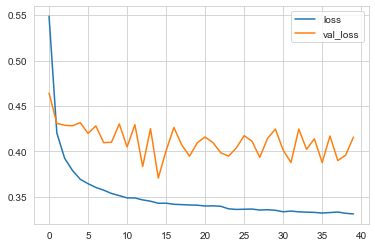

In [109]:
losses[['loss','val_loss']].plot()

In [110]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

240/240 [==============================] - 1s 2ms/step


In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6797
           1       0.27      0.61      0.37       852

    accuracy                           0.77      7649
   macro avg       0.60      0.70      0.62      7649
weighted avg       0.87      0.77      0.80      7649



Still doesn't make any positive impact

# XGBoost

Now i'm gonna introduce XGBoost to fine tune the model 

In [73]:
from xgboost import XGBClassifier

In [82]:
#Compute scale_pos_weight
ratio = y_train_smote.value_counts()[0]/y_train_smote.value_counts()[1] 

In [83]:
#Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = ratio,  #Address class imbalance
    learning_rate = 0.1,
    max_depth = 6,
    n_estimators = 100,
    random_state = 42)

In [84]:
#Train the model on SMOTE-resampled data
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
#predict on the test set
y_pred = xgb_model.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6797
           1       0.34      0.48      0.40       852

    accuracy                           0.84      7649
   macro avg       0.64      0.68      0.65      7649
weighted avg       0.87      0.84      0.85      7649



Good result but not up to expectations yet

Now lemme try XGBoost on the data before smote

In [122]:
X = dfc.drop('y',axis=1)
Y = dfc['y']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [124]:
scaler = MinMaxScaler()

In [125]:
X_train = scaler.fit_transform(X_train)

In [126]:
X_test = scaler.transform(X_test)

In [117]:
ratio = y_train.value_counts()[0]/y_train.value_counts()[1] 

In [118]:
xgb_model = XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = ratio,  #Address class imbalance
    learning_rate = 0.1,
    max_depth = 6,
    n_estimators = 100,
    random_state = 42)

In [119]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [120]:
y_pred = xgb_model.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6816
           1       0.36      0.63      0.46       833

    accuracy                           0.84      7649
   macro avg       0.65      0.75      0.68      7649
weighted avg       0.89      0.84      0.86      7649



Hmm it looks like the Data without Smote is responding better to these models

#### Now i want to create a more sensitive Neural network to the initial dataset

In [127]:
from sklearn.utils.class_weight import compute_class_weight

In [128]:
#I'm introducing class weights to give more weight to the minority class and less weight to the majority class during training
class_weights = compute_class_weight(
    class_weight = 'balanced',          
    classes = np.unique(y_train),
    y=y_train) 

In [129]:
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5630267564682934, 1: 4.466569343065694}


In [130]:
INPUT_DIM = X_train.shape[1]

In [131]:
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation = 'relu', input_dim = input_dim),
        Dropout(0.3),
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [132]:
model = create_model(INPUT_DIM)

In [133]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 30,
    batch_size = 32,
    class_weight = class_weights_dict)

Epoch 1/30
957/957 [==============================] - 6s 5ms/step - loss: 0.5795 - accuracy: 0.7850 - val_loss: 0.5703 - val_accuracy: 0.8249
Epoch 2/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5536 - accuracy: 0.8082 - val_loss: 0.4981 - val_accuracy: 0.8414
Epoch 3/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5483 - accuracy: 0.8195 - val_loss: 0.5841 - val_accuracy: 0.8025
Epoch 4/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5459 - accuracy: 0.8275 - val_loss: 0.5256 - val_accuracy: 0.8178
Epoch 5/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5439 - accuracy: 0.8286 - val_loss: 0.4840 - val_accuracy: 0.8567
Epoch 6/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5401 - accuracy: 0.8332 - val_loss: 0.5194 - val_accuracy: 0.8225
Epoch 7/30
957/957 [==============================] - 4s 4ms/step - loss: 0.5392 - accuracy: 0.8302 - val_loss: 0.5121 - val_accuracy: 0.8470
Epoch 

In [134]:
y_pred = (model.predict(X_test)>0.5).astype('int32')

240/240 [==============================] - 1s 2ms/step


In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6816
           1       0.35      0.61      0.45       833

    accuracy                           0.84      7649
   macro avg       0.65      0.74      0.68      7649
weighted avg       0.88      0.84      0.85      7649



This is a good result but still in the range of what we've been getting

### Lemme do a little more Feature engineering

Our initial dataset

In [51]:
df

,age,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,previous_Not contacted,poutcome_nonexistent,poutcome_success,pdayss_Not contacted
0,56,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,57,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,37,1,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,40,0,0,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,56,0,1,1,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1
41184,46,0,0,1,-1.1,94.767,-50.8,0,1,0,...,0,0,0,1,0,0,1,1,0,1
41185,56,1,0,2,-1.1,94.767,-50.8,0,0,0,...,0,0,0,1,0,0,1,1,0,1
41186,44,0,0,1,-1.1,94.767,-50.8,1,0,0,...,0,0,0,1,0,0,1,1,0,1


C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

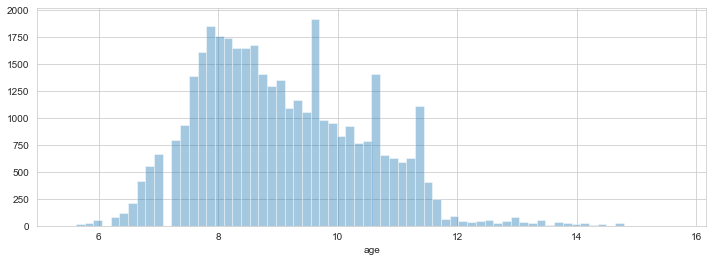

In [52]:
plt.figure(figsize=(12,4))
sns.distplot(df['age']**0.6,bins = 70, kde=False)

I'm performing a power transform on the Age column to give it a Gausian distribution, which is generally prefered by most models

In [53]:
df['age'] = df['age']**0.6

For the next features, I am going to group them and turn them to categorical features

In [54]:
def impute_empvar(empvar):
    if -4 < empvar < -2:
        return "-4 to -2"
    if -2 < empvar < 0:
        return "-2 to 0"
    else:
        return "0 to 2"

In [55]:
df['emp.var.rate'] = df['emp.var.rate'].apply(impute_empvar) #applying the function

In [56]:
def impute_consprice(consprice):
    if 92 < consprice < 93:
        return "92 to 93"
    if 93 < consprice < 94:
        return "93 to 94"
    else:
        return "94 to 95"

In [57]:
df['cons.price.idx'] = df['cons.price.idx'].apply(impute_consprice) #applying the function

In [58]:
def impute_consconf(consconf):
    if -51 < consconf < -46:
        return " -51 to -46"
    if -46 < consconf < -41:
        return "-46 to -41"
    if -41 < consconf < -36:
        return "-41 to -36"
    if -36 < consconf < -31:
        return "-36 to -31"
    else:
        return "-31 to -26"

In [59]:
df['cons.conf.idx'] = df['cons.conf.idx'].apply(impute_consconf) #applying the function

In [60]:
dummies = pd.get_dummies(df[['cons.conf.idx','cons.price.idx','emp.var.rate']],drop_first=True)
df = df.drop(['cons.conf.idx','cons.price.idx','emp.var.rate'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [61]:
df

,age,housing,loan,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_success,pdayss_Not contacted,cons.conf.idx_-31 to -26,cons.conf.idx_-36 to -31,cons.conf.idx_-41 to -36,cons.conf.idx_-46 to -41,cons.price.idx_93 to 94,cons.price.idx_94 to 95,emp.var.rate_-4 to -2,emp.var.rate_0 to 2
0,11.192132,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
1,11.311623,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
2,8.728127,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,9.146101,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4,11.192132,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,13.121809,1,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
41184,9.946143,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,11.192132,1,0,2,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
41186,9.684375,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Train Test Split
#### Now we go over everything again

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop('y',axis=1).values
Y = df['y'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [66]:
#Scaling the data, this improves the model
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

Beginning with buiding a neural network like we did before

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [71]:
model = Sequential()

model.add(Dense(45,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(45, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(5, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [74]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=250,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
123/123 [==============================] - 7s 14ms/step - loss: 0.3857 - val_loss: 0.2868
Epoch 2/600
123/123 [==============================] - 1s 7ms/step - loss: 0.3151 - val_loss: 0.2737
Epoch 3/600
123/123 [==============================] - 1s 6ms/step - loss: 0.3029 - val_loss: 0.2724
Epoch 4/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2982 - val_loss: 0.2755
Epoch 5/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2951 - val_loss: 0.2723
Epoch 6/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2924 - val_loss: 0.2680
Epoch 7/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2904 - val_loss: 0.2727
Epoch 8/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2872 - val_loss: 0.2711
Epoch 9/600
123/123 [==============================] - 1s 6ms/step - loss: 0.2850 - val_loss: 0.2691
Epoch 10/600
123/123 [==============================] - 1s 7ms/step - loss: 0.2859 - val_l

In [75]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

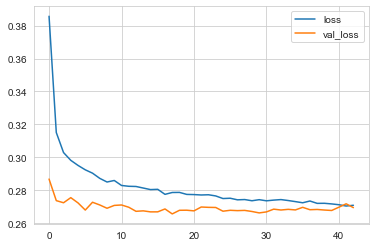

In [76]:
losses[['loss','val_loss']].plot()

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

240/240 [==============================] - 1s 2ms/step


In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6816
           1       0.52      0.41      0.46       833

    accuracy                           0.89      7649
   macro avg       0.72      0.68      0.70      7649
weighted avg       0.88      0.89      0.89      7649



Okay this is good but basically the same result as the very first neural network

Let's make the model more sensitive

In [80]:
from sklearn.utils.class_weight import compute_class_weight

In [81]:
class_weights = compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train),
    y=y_train) 

In [82]:
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5630267564682934, 1: 4.466569343065694}


In [90]:
model = Sequential()

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(8, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=250,
          class_weight = class_weights_dict,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
123/123 [==============================] - 3s 11ms/step - loss: 0.6483 - val_loss: 0.5568
Epoch 2/600
123/123 [==============================] - 1s 10ms/step - loss: 0.5729 - val_loss: 0.5522
Epoch 3/600
123/123 [==============================] - 1s 8ms/step - loss: 0.5585 - val_loss: 0.5539
Epoch 4/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5528 - val_loss: 0.5061
Epoch 5/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5514 - val_loss: 0.5435
Epoch 6/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5483 - val_loss: 0.5255
Epoch 7/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5467 - val_loss: 0.5706
Epoch 8/600
123/123 [==============================] - 1s 8ms/step - loss: 0.5455 - val_loss: 0.5513
Epoch 9/600
123/123 [==============================] - 1s 8ms/step - loss: 0.5429 - val_loss: 0.5221
Epoch 10/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5413 - val_

In [92]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

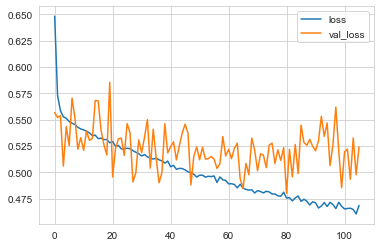

In [93]:
losses[['loss','val_loss']].plot()

In [94]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

240/240 [==============================] - 1s 2ms/step


In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      6816
           1       0.24      0.70      0.36       833

    accuracy                           0.72      7649
   macro avg       0.59      0.71      0.59      7649
weighted avg       0.87      0.72      0.77      7649



Well that didn't go as planned

Trying XGBoostagain to the mix

In [96]:
from xgboost import XGBClassifier

In [98]:
X = df.drop('y',axis=1)
Y = df['y']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [100]:
scaler = MinMaxScaler()

In [101]:
X_train = scaler.fit_transform(X_train)

In [102]:
X_test = scaler.transform(X_test)

In [103]:
#Compute scale_pos_weight
ratio = y_train.value_counts()[0]/y_train.value_counts()[1] 

In [104]:
#Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = ratio,  #Address class imbalance
    learning_rate = 0.1,
    max_depth = 6,
    n_estimators = 100,
    random_state = 42)

In [105]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [106]:
y_pred = xgb_model.predict(X_test)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6816
           1       0.36      0.63      0.46       833

    accuracy                           0.83      7649
   macro avg       0.65      0.75      0.68      7649
weighted avg       0.89      0.83      0.85      7649



This also does well but not as good as the first model

Now it can clearly be seen that in a classification problem, Building a neural network is probably your best bet.

Once the original data is highly skewed, it would most definitely affect the final result, there is only so much you can do to help the minority class.

For whatever reason, using SMOTE to create synthetic values and balance up the classes wasn't effective.

Neither was making the model extra sensitive with adding weights or XGBoost.

From all i have done, the most effective model came with the extra feature engineering and the conventional neural network, to yield an Fi score of 94% and 46% for the 0 and 1 classes respectively.

There are other posible combinatins and methods that i didn't try that could prove effective, i'm open to suggestions and the data has been provided so you could explore yourself and get your finding. 

Thankyou.
